In [10]:
import numpy as np
import pandas as pd
from pyEDM import CCM
import matplotlib.pyplot as plt
np.random.seed(42)

# Generate synthetic data
def generate_data(n=1000, case='linear'):
    X = np.zeros(n)
    Y = np.zeros(n)
    
    # Common driver for X
    X[0] = np.random.normal()
    for t in range(1, n):
        X[t] = 0.8 * X[t-1] + np.random.normal(0, 0.1)
    
    # Generate Y based on case
    if case == 'linear':
        for t in range(1, n):
            Y[t] = 0.6 * Y[t-1] + 0.3 * X[t-1] + np.random.normal(0, 0.1)
    else:  # non-linear
        for t in range(1, n):
            Y[t] = 0.6 * Y[t-1] + 0.3 * (X[t-1])**2 + np.random.normal(0, 0.1)
    
    return pd.DataFrame({'X': X, 'Y': Y})

# Perform CCM analysis and plot
def perform_ccm_analysis(data, case_name):
    plt.figure(figsize=(12, 6))
    
    # CCM for X->Y
    ccm_XY = CCM(data, E=2, columns='X', target='Y', 
                libSizes=range(10, 1000, 50), sample=100)
    plt.plot(ccm_XY['LibSize'], ccm_XY['rho'], 'o-', label='X causes Y')
    
    # CCM for Y->X
    ccm_YX = CCM(data, E=2, columns='Y', target='X', 
                libSizes=range(10, 1000, 50), sample=100)
    plt.plot(ccm_YX['LibSize'], ccm_YX['rho'], 'o-', label='Y causes X')
    
    plt.xlabel('Library Size', fontsize=12)
    plt.ylabel('Prediction Skill (ρ)', fontsize=12)
    plt.title(f'CCM Analysis ({case_name} Case)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Linear case analysis
linear_data = generate_data(case='linear')
perform_ccm_analysis(linear_data, 'Linear')

# Non-linear case analysis
nonlinear_data = generate_data(case='non-linear')
perform_ccm_analysis(nonlinear_data, 'Non-Linear')

Exception: CCM(): Invalid data input.

<Figure size 1200x600 with 0 Axes>

1000


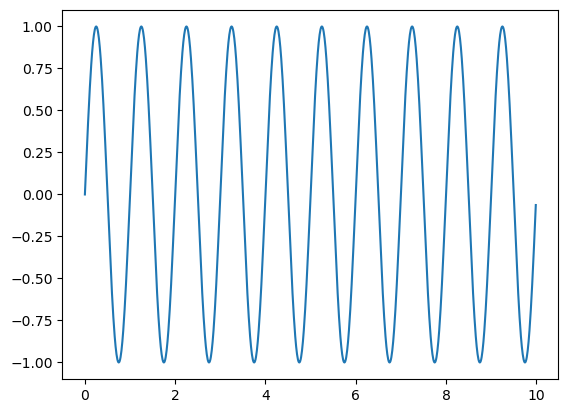

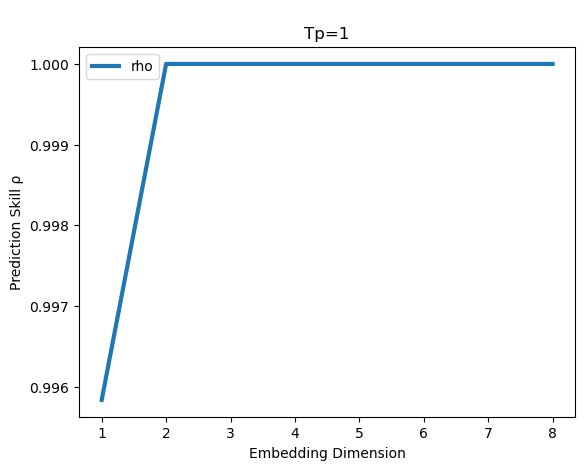

     E       rho
0  1.0  0.995836
1  2.0  1.000000
2  3.0  1.000000
3  4.0  1.000000
4  5.0  1.000000
5  6.0  1.000000
6  7.0  1.000000
7  8.0  1.000000


In [23]:
import numpy as np
import pandas as pd

# pyEDM is typically imported like so:
import pyEDM

# 1. Generate a synthetic sine wave time series
t = np.arange(0, 10, 0.01)   # 0 to 10, step 0.01
ts = np.sin(2 * np.pi * t)  # a basic sine wave

# print the length of the time series
print(len(ts))

# plot ts
import matplotlib.pyplot as plt
plt.plot(t, ts)

data = pd.DataFrame({"Time": t, "Sine": ts})


embedding_results = pyEDM.EmbedDimension(
    dataFrame = data,
    columns   = "Sine",
    target    = "Sine",
    lib       = "1 700",    # use first 700 points as 'library'
    pred      = "701 1000", # predict on the latter points
    maxE      = 8,
    tau = 10,
)

print(embedding_results)


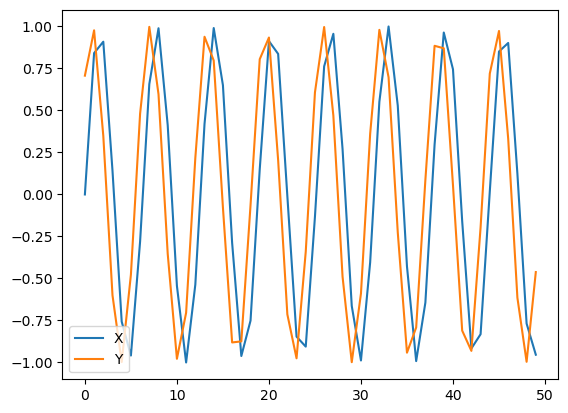

   LibSize       X:Y       Y:X
0     10.0  0.969423  0.911060
1     20.0  0.991039  0.985774
2     30.0  0.996326  0.993309
3     40.0  0.998102  0.997822
Columns: Index(['LibSize', 'X:Y', 'Y:X'], dtype='object')


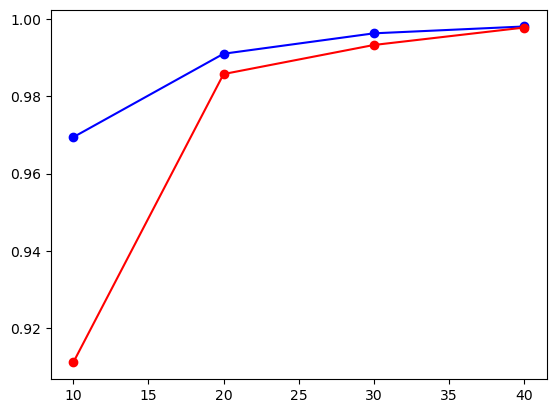

In [9]:
import pandas as pd
import numpy as np
from pyEDM import CCM

# Sample time series
t = np.arange(50)
x = np.sin(t)
y = np.sin(t + np.pi/4)

# plot the time series
import matplotlib.pyplot as plt
plt.plot(t, x, label='X')
plt.plot(t, y, label='Y')
plt.legend()
plt.show()

# Prepare DataFrame
df = pd.DataFrame({
    'Time': t,
    'X': x,
    'Y': y
})

# CCM call
ccm_out = CCM(
    dataFrame   = df,
    E           = 2,
    tau         = 1,
    columns     = "X",   # predictor
    target      = "Y",   # target
    libSizes    = "10 20 30 40",
    sample      = 10,
    random      = True,
    replacement = False,
    Tp          = 0
)

print(ccm_out)
print("Columns:", ccm_out.columns)

# plot the results
plt.plot(ccm_out['LibSize'], ccm_out['X:Y'], 'bo-')
plt.plot(ccm_out['LibSize'], ccm_out['Y:X'], 'ro-')



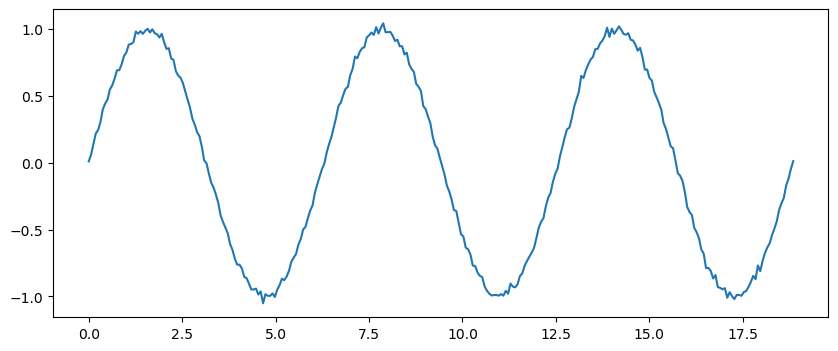

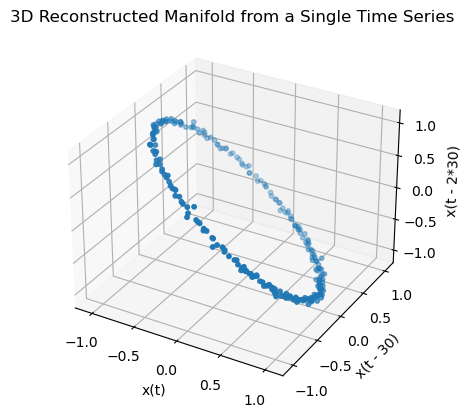

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate a univariate time series
#    Here we create a noisy sine wave for demonstration.
np.random.seed(42)  # For reproducibility
num_points = 300
time = np.linspace(0, 6*np.pi, num_points)  # 0 to 6π
true_signal = np.sin(time)
noise = 0.02 * np.random.randn(num_points)
x = true_signal + noise

# plot the time series
plt.figure(figsize=(10, 4))
plt.plot(time, x, label="Noisy Sine Wave")

# 2. Define parameters for Takens’ embedding
E = 3      # Embedding dimension
tau = 30    # Time lag

# 3. Construct the embedded manifold (shadow manifold)
#    X(t) = [ x(t), x(t - tau), x(t - 2*tau) ]
#    We'll skip the first (E-1)*tau points that can't form a full vector.
def takens_embedding(series, embedding_dimension, delay):
    """
    Returns the embedded (reconstructed) state-space from a given 1D time series.
    """
    N = len(series)
    # Number of valid embedded points
    M = N - (embedding_dimension - 1)*delay
    
    # Prepare an array for the embedded data
    embedded_data = np.zeros((M, embedding_dimension))
    for i in range(M):
        for e in range(embedding_dimension):
            embedded_data[i, e] = series[i + e*delay]
    return embedded_data

embedded = takens_embedding(x, E, tau)

# 4. Plot the manifold in 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(
    embedded[:, 0],
    embedded[:, 1],
    embedded[:, 2],
    s=10  # marker size
)

ax.set_xlabel("x(t)")
ax.set_ylabel(f"x(t - {tau})")
ax.set_zlabel(f"x(t - 2*{tau})")
ax.set_title("3D Reconstructed Manifold from a Single Time Series")

plt.show()
